In [14]:
from urllib.request import urlopen

import numpy as np
import pandas as pd
import datetime
import cartopy
import cartopy.crs as ccrs
from cartopy.feature.nightshade import Nightshade
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap

import aacgmv2

from ovationpyme import ovation_prime

from harc_plot import gen_lib
geopack = gen_lib.geopack

Re = 6371

%matplotlib inline

In [15]:
dt     = datetime.datetime(2017,11,3,10)
height = 110.

# AACGM Testing

In [16]:
lat  = 60.
lons = np.arange(-180,180,30)

df_lst = []
for lon in lons:
    
    lon_hr = lon/15.
    lt     = dt + datetime.timedelta(hours=lon_hr)
    
    mlat,mlon,out_r = aacgmv2.convert_latlon(lat,lon,height,dt)
    mlt_hr = aacgmv2.convert_mlt(mlon,dt)[0]
    mlt    = datetime.time(int(mlt_hr),int((mlt_hr-int(mlt_hr))*60.))
    
    tmp = {'UT':dt,'lat':lat,'lon':lon,'lon_hr':lon_hr,'LT':lt,'mlat':mlat,'mlon':mlon,'MLT':mlt,'LT':lt}
    df_lst.append(tmp)
    
df_mag = pd.DataFrame(df_lst)
df_mag

,UT,lat,lon,lon_hr,LT,mlat,mlon,MLT
0,2017-11-03 10:00:00,60.0,-180,-12.0,2017-11-02 22:00:00,55.769703,-116.110055,21:45:00
1,2017-11-03 10:00:00,60.0,-150,-10.0,2017-11-03 00:00:00,59.897313,-91.694162,23:23:00
2,2017-11-03 10:00:00,60.0,-120,-8.0,2017-11-03 02:00:00,65.580217,-61.030215,01:26:00
3,2017-11-03 10:00:00,60.0,-90,-6.0,2017-11-03 04:00:00,69.022592,-18.489788,04:16:00
4,2017-11-03 10:00:00,60.0,-60,-4.0,2017-11-03 06:00:00,66.358479,25.108587,07:10:00
5,2017-11-03 10:00:00,60.0,-30,-2.0,2017-11-03 08:00:00,60.997255,55.931277,09:13:00
6,2017-11-03 10:00:00,60.0,0,0.0,2017-11-03 10:00:00,57.635210,80.555750,10:52:00
7,2017-11-03 10:00:00,60.0,30,2.0,2017-11-03 12:00:00,56.773460,105.936869,12:33:00
8,2017-11-03 10:00:00,60.0,60,4.0,2017-11-03 14:00:00,56.787082,133.956536,14:25:00
9,2017-11-03 10:00:00,60.0,90,6.0,2017-11-03 16:00:00,56.539327,163.995961,16:26:00


# Ovation Prime

In [17]:
hemi = 'N'
fluxtype = 'mono'
estimator = ovation_prime.ConductanceEstimator(fluxtypes=[fluxtype])
mlatgrid,mltgrid,diff_numflux = estimator.numflux_estimator[fluxtype].get_flux_for_time(dt,hemi=hemi)
#mlatgird,mltgrid,diff_eavg    = estimator.eavg_estimator['diff'].get_eavg_for_time(dt,hemi=hemi)

In [18]:
# Convert MLTs to Magnetic Longitudes
shape = mltgrid.shape
mlongrid = aacgmv2.convert_mlt(mltgrid.flatten(),dt,True)
mlongrid = np.array(mlongrid)
mlongrid.shape = shape

In [19]:
# Convert magnetic coordinates to geographic coordinates.
shape = mltgrid.shape
glatgrid, glongrid, out_r = aacgmv2.convert_latlon_arr(mlatgrid.flatten(),mlongrid.flatten(),height,dt,'A2G')

glatgrid = np.array(glatgrid)
glatgrid.shape = shape

glongrid = np.array(glongrid)
glongrid.shape = shape

## Plot in Magnetic Coordinates

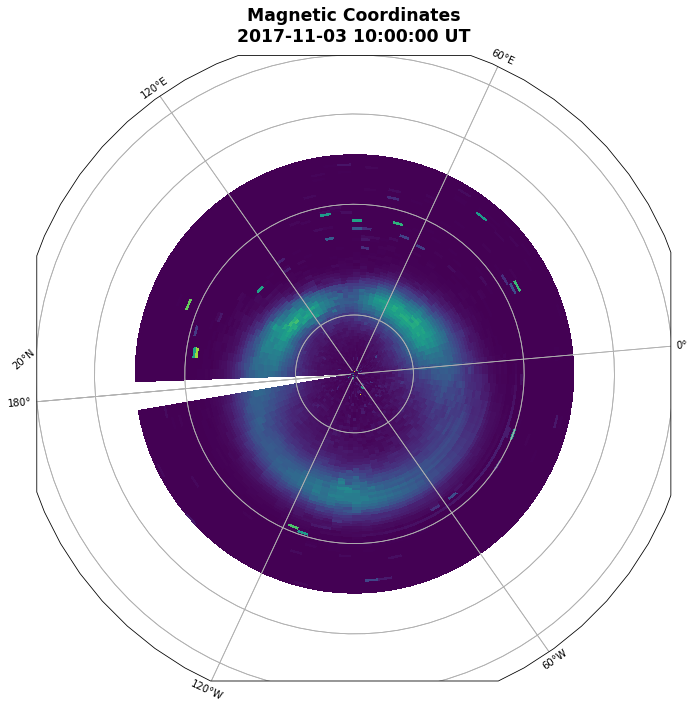

In [22]:
fig = plt.figure(figsize=(25,25))
projection = ccrs.Orthographic(-95, 90)
data_crs   = ccrs.PlateCarree()

ax  = fig.add_subplot(1, 2, 1, projection=projection)
ax.gridlines()
#ax.coastlines(zorder=3)

gl = ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True)

ax.pcolormesh(mlongrid,mlatgrid,diff_numflux,transform=data_crs)

ax.set_extent((-180,180,20,90), crs = data_crs)

ax.set_title('Magnetic Coordinates\n{!s} UT'.format(dt))

plt.show()

## Plot in Geographic Coordinates

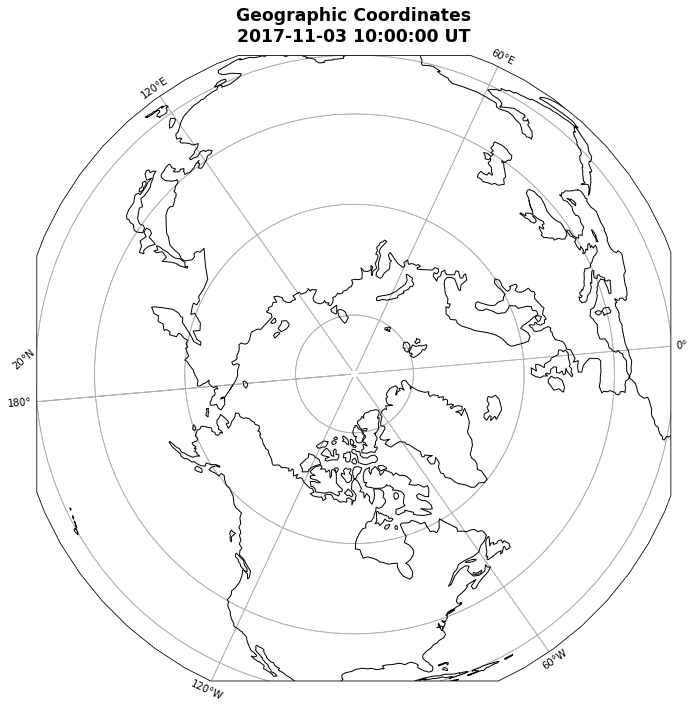

In [ ]:
fig = plt.figure(figsize=(25,25))
projection = ccrs.Orthographic(-95, 90)
data_crs   = ccrs.PlateCarree()

ax  = fig.add_subplot(1, 2, 1, projection=projection)
ax.gridlines()
ax.coastlines(zorder=3)

gl = ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True)

ax.pcolormesh(glongrid,glatgrid,diff_numflux,transform=data_crs)

ax.set_extent((-180,180,20,90), crs = data_crs)

ax.set_title('Geographic Coordinates\n{!s} UT'.format(dt))

plt.show()

# High Latitude Geography

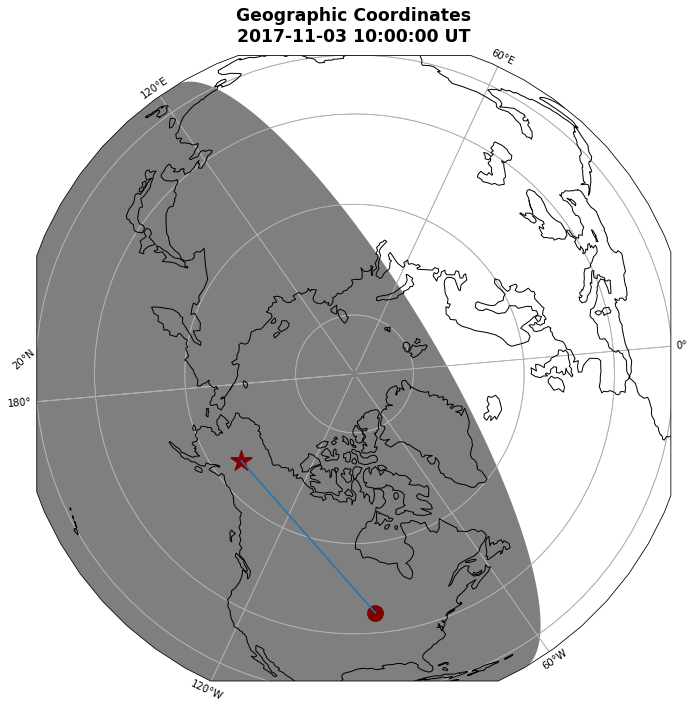

In [23]:
pfisr_lat =   65.12992
pfisr_lon = -147.47104
lstid_lat =  45.
lstid_lon = -90.

fig = plt.figure(figsize=(25,25))
projection = ccrs.Orthographic(-95, 90)
data_crs   = ccrs.PlateCarree()

ax  = fig.add_subplot(1, 2, 1, projection=projection)

ax.coastlines(zorder=3)
#ax.stock_img()
ax.gridlines()
ax.add_feature(Nightshade(dt))

gl = ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True)
ax.scatter([pfisr_lon],[pfisr_lat],marker='*',transform=data_crs,s=500,fc='r')
ax.scatter([lstid_lon],[lstid_lat],marker='o',transform=data_crs,s=250,fc='r')
ax.plot([pfisr_lon,lstid_lon],[pfisr_lat,lstid_lat],transform=ccrs.Geodetic())

ax.set_extent((-180,180,20,90), crs = data_crs)
ax.set_title('Geographic Coordinates\n{!s} UT'.format(dt))


plt.show()



In [10]:
rgc_pfisr = Re*geopack.greatCircleDist(pfisr_lat,pfisr_lon,lstid_lat,lstid_lon)
azm_pfisr = geopack.greatCircleAzm(pfisr_lat,pfisr_lon,lstid_lat,lstid_lon)

print('rgc_pfisr: {:.0f} km'.format(rgc_pfisr))
print('azm_pfisr: {:.0f} deg'.format(azm_pfisr))
vp = 1220
print('time: {:.1f} hr'.format(rgc_pfisr/vp))

rgc_pfisr: 4084 km
azm_pfisr: 95 deg
time: 3.3 hr


In [11]:
azm = 180+163
rgc = 2*1220
src_lat, src_lon = geopack.greatCircleMove(lstid_lat,lstid_lon,rgc,azm)

/home/w2naf/anaconda3/lib/python3.7/site-packages/numpy/core/_asarray.py:171: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return array(a, dtype, copy=False, order=order, subok=True)


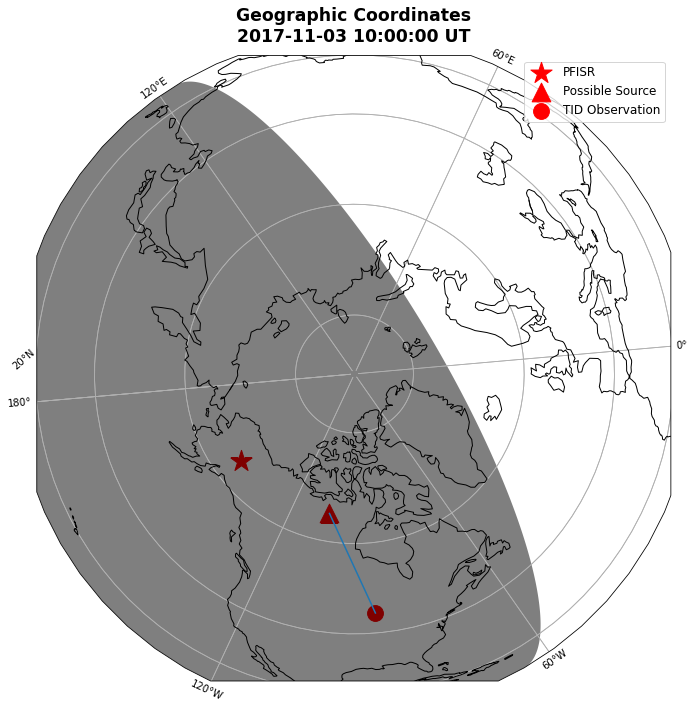

In [25]:
fig = plt.figure(figsize=(25,25))
projection = ccrs.Orthographic(-95, 90)
data_crs   = ccrs.PlateCarree()

ax  = fig.add_subplot(1, 2, 1, projection=projection)

ax.coastlines(zorder=3)
#ax.stock_img()
ax.gridlines()
ax.add_feature(Nightshade(dt))

gl = ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True)
ax.plot([src_lon,lstid_lon],[src_lat,lstid_lat],transform=ccrs.Geodetic())
ax.scatter([pfisr_lon],[pfisr_lat],marker='*',transform=data_crs,s=500,fc='r',label='PFISR')
ax.scatter([src_lon],[src_lat],marker='^',transform=data_crs,s=350,fc='r',label='Possible Source')
ax.scatter([lstid_lon],[lstid_lat],marker='o',transform=data_crs,s=250,fc='r',label='TID Observation')

ax.set_extent((-180,180,20,90), crs = data_crs)
ax.legend()
ax.set_title('Geographic Coordinates\n{!s} UT'.format(dt))
plt.show()